# Principal Component Analysis

## Assignment Explanation   
**Z-scoring**       
x, y, n개의 2차원 공간에서의 포인트. Component analysis를 위해 normalize를 한다. 포인트가 센터가 0로 오도록 하고, 각 direction에 std가 1이 되도록 한다. 모든 포인트 x의 산술 평균, y의 평균을 의미한다. 이것을 각 std로 나누어주면 변환된  $\tilde{x}$, $\tilde{y}$ 는 mean 0, std 1이 된다. 이를 z-scoring이라고 한다.   

**Covariance Matrix**    
$z_i$ = [$x_i$ $y_i$], 모든 데이터에 ${z_i}\cdot{z_i^T}$ 를 모두 더한 것이 Covariance Matrix. 이를 ${Z}\cdot{Z^T}$ 로 나타낼 수 있는데, Z는 각 벡터의 Transpose이다.   

eigenvector주어진 데이터들의 principal components를 찾기 위해서는 matrix의 eigenvalue, eigenvector를 구하자. Covariance Matrix Sigma의 eigenvector는 u 람다가 value. value 크기가 가장 큰 것이 first pricipal component, 그 다음이 second ... 우리가 얻고자 하는 것은 value와 vector을 곱한 것이다.

## import library

In [543]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [544]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',') # load data = feature

number_data     = np.size(feature0, 0) 
number_feature  = np.size(feature0, 1) # feature 수, x & y

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

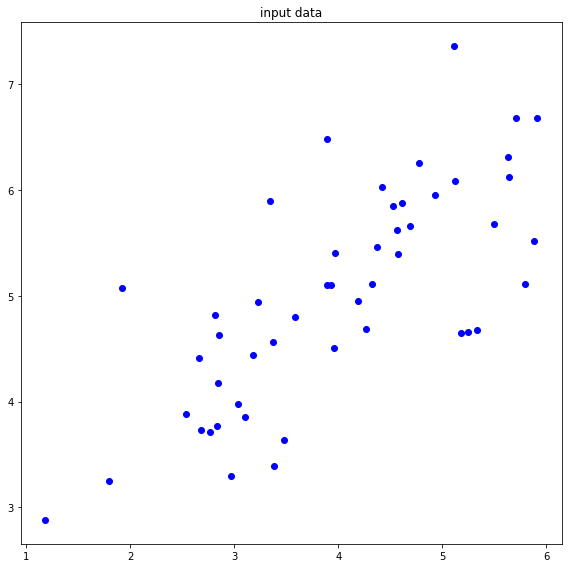

In [545]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [546]:
def normalize(feature):
    # mean, std 사용
    # x의 평균, std & y의 평균, std를 구하기 
    # 각 데이터에서 평균을 빼고 std로 나누기
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x_tilde = (feature[:, 0] - np.mean(feature[:,0])) / np.std(feature[:,0])
    y_tilde = (feature[:, 1] - np.mean(feature[:,1])) / np.std(feature[:,1])
    feature_normalize = np.c_[x_tilde, y_tilde]


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [547]:
feature = normalize(feature0)

# normalized
x   = feature[:, 0]
y   = feature[:, 1]

# for the graph
min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [548]:
def compute_covariance(feature):
    # covariance matrix
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    Sigma = (1 / feature.shape[0]) * np.dot(feature.T, feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [549]:
def compute_principal_component(feature): # 2차원이기 때문에 principal component 2개
    # covariance matrix 구하기
    # Sigma의 eigenvalue, vector 구하기
    # 크기에 따라 가장 큰 value를 갖는 vector, 두번째로 큰 것 얻기
    # vector은 함수 사용하고, value 크기에 따라 sort하여 얻기
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    covariance_matrix = compute_covariance(feature)
    eigenvalues, eigenvector = np.linalg.eig(covariance_matrix)
    idx = eigenvalues.argsort()[::-1] # reverse
    principal_component_1 = (eigenvalues[idx][0] * eigenvector[:, 0]).reshape(2, 1)
    principal_component_2 = (eigenvalues[idx][1] * eigenvector[:, 1]).reshape(2, 1)
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2) # value X vector

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [566]:
def compute_projection_onto_line(feature, vector):
    # 주어진 vector에 대해 feature point projection 구하는 함수
    # vector가 해당하는 line에 orthogonal projection 해서 해당하는 point가 어떤 지점인지 output으로 내는 함수
    # feature = point, vector에 대해 그가 나타내는 line으로 projection한 point를 return
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    # feature (50, 2), vector (2, 1)

    projection = []

    for i in range(feature.shape[0]):
        proj = (np.dot(feature[i], vector) / np.linalg.norm(vector) ** 2) * vector
        projection.append(proj)
    
    projection = np.stack(projection, axis = 0).reshape(50, 2)



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [567]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [556]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [557]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='b')
    plt.arrow(0, 0, float(principal_component_1[0]), float(principal_component_1[1]), width = 0.03, color = 'r')
    plt.arrow(0, 0, float(principal_component_2[0]), float(principal_component_2[1]), width= 0.03, color = 'g')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [559]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='b')
    plt.axline((0, 0), (float(principal_component_1[0]), float(principal_component_1[1])), color='r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [560]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='b')
    plt.axline((0, 0), (float(principal_component_2[0]), float(principal_component_2[1])), color='r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [561]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='b')
    plt.axline((0, 0), (float(principal_component_1[0]), float(principal_component_1[1])), color='r')
    plt.scatter(projection1[:, 0], projection1[:, 1], color = 'g')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [562]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='b')
    plt.axline((0, 0), (float(principal_component_2[0]), float(principal_component_2[1])), color='r')
    plt.scatter(projection2[:, 0], projection2[:, 1], color = 'g')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [563]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    plt.scatter(x, y, color='b')
    plt.axline((0, 0), (float(principal_component_1[0]), float(principal_component_1[1])), color='r')
    plt.scatter(projection1[:, 0], projection1[:, 1], color = 'g')

    for i in range(feature.shape[0]):
        plt.plot([feature[i, 0], projection1[i, 0]], [feature[i, 1], projection1[i, 1]], color = 'gray')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [564]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='b')
    plt.axline((0, 0), (float(principal_component_2[0]), float(principal_component_2[1])), color='r')
    plt.scatter(projection2[:, 0], projection2[:, 1], color = 'g')

    for i in range(feature.shape[0]):
        plt.plot([feature[i, 0], projection2[i, 0]], [feature[i, 1], projection2[i, 1]], color = 'gray')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


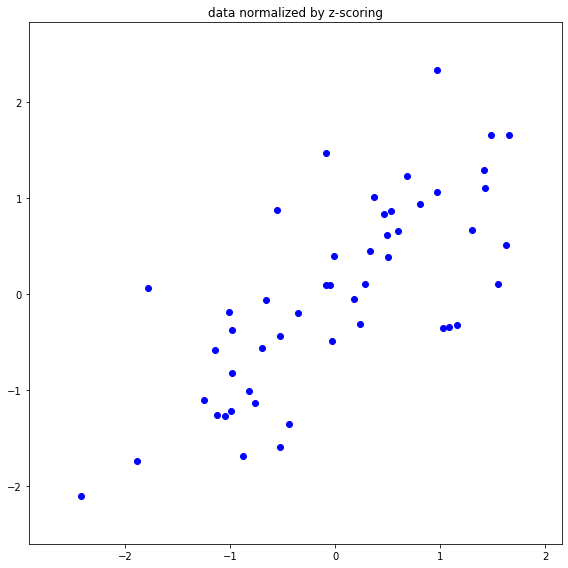

**************************************************
## [RESULT 02]
**************************************************


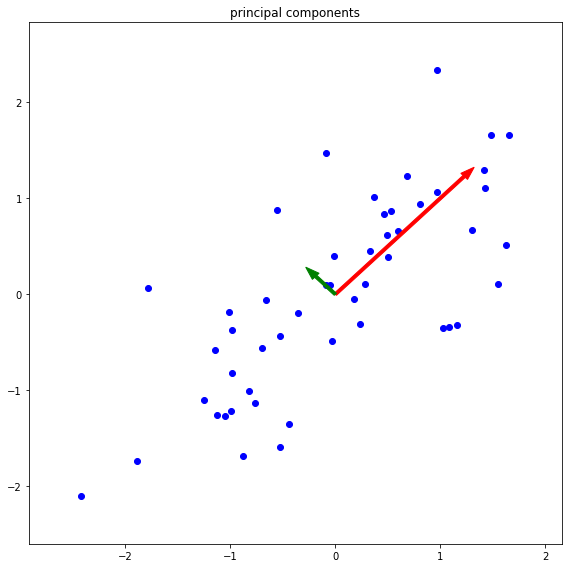

**************************************************
## [RESULT 03]
**************************************************


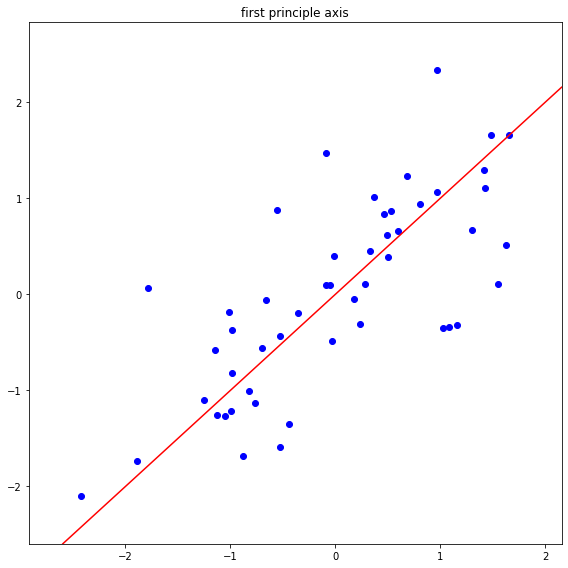

**************************************************
## [RESULT 04]
**************************************************


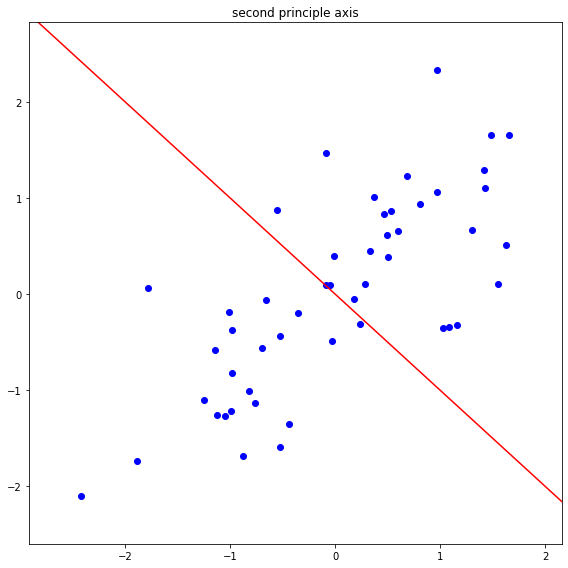

**************************************************
## [RESULT 05]
**************************************************


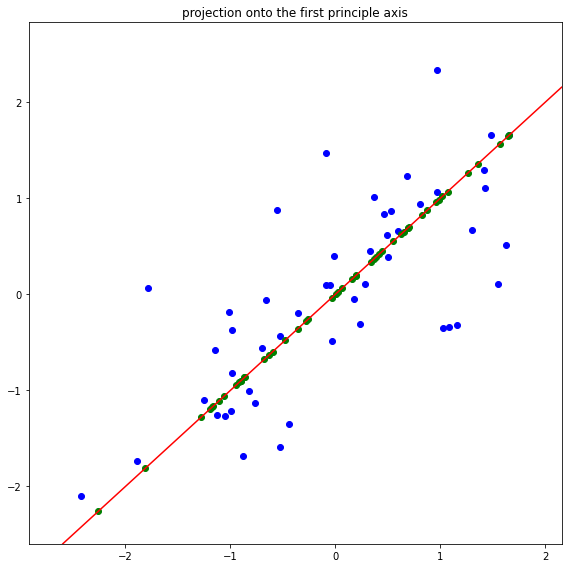

**************************************************
## [RESULT 06]
**************************************************


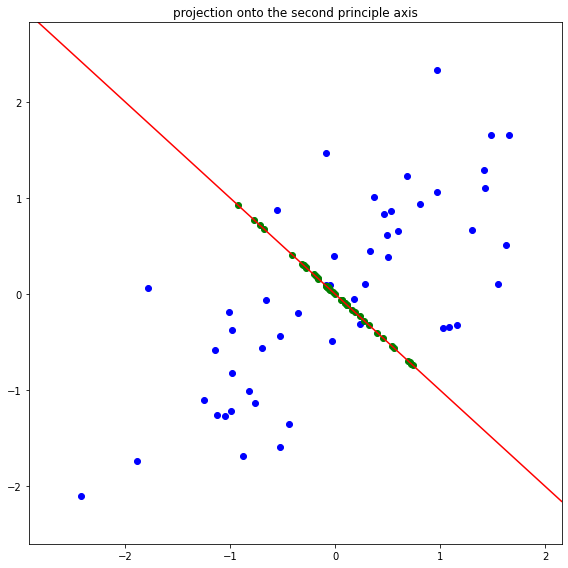

**************************************************
## [RESULT 07]
**************************************************


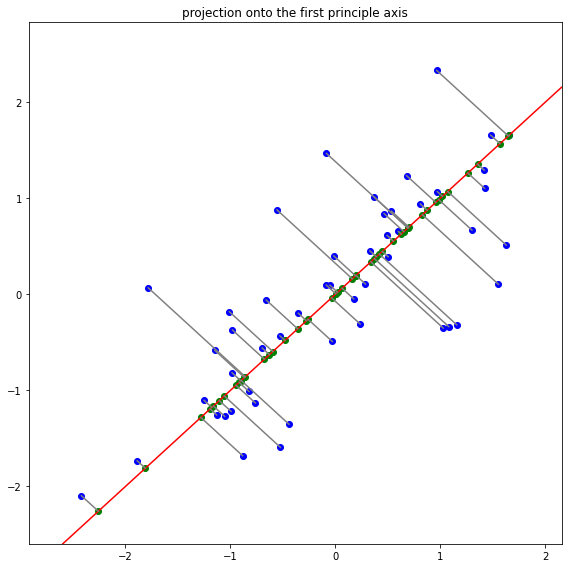

**************************************************
## [RESULT 08]
**************************************************


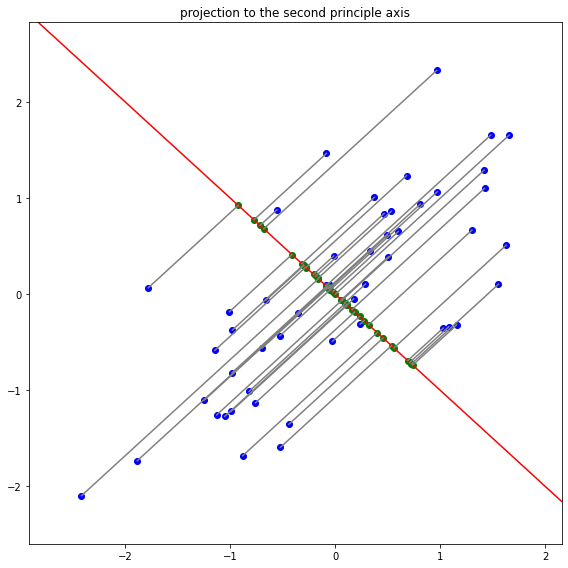

In [565]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)